# Nguyễn Thái Vũ - 1712921

## Các câu hỏi dự kiến sẽ được khám phá 
1. Thống kê số lượng người nhiễm covid19 và số lượng người tử vong trên toàn thế giới.
2. Dự đoán số ca nhiễm bệnh trong 14 ngày tiếp theo trên toàn thế giới.
3. Thống kê tình hình covid19 ở Việt Nam
4. Dự đoán số ca nhiễm trong 14 ngày tiếp theo. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Đọc dữ liệu từ file csv (index_col=0 để loại bỏ những cột Unnamed (số thứ tự trong file csv))
df_covid19 = pd.read_csv("cases_country.csv", index_col=0)

# 1. THỐNG KÊ SỐ LƯỢNG NGƯỜI NHIỄM COVID VÀ SỐ LƯỢNG NGƯỜI TỬ VONG TRÊN TOÀN THẾ GIỚI

## 1.1 Xử lý dữ liệu 

In [3]:
# Đổi tên lại các column cho việc thao tác dễ dàng hơn
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})

- "df_covid19" chứa thông tin về dịch bệnh covid trên mỗi quốc gia (số người tử vong, số người nhiễm bệnh, số người hồi phục...), gồm 188 dòng - tương ứng 188 quốc gia.
- Ta sẽ loại bỏ những thuộc tính (cột) không liên quan đến việc ta phân tích:
    + Ta thấy People_Tested và People_Hospitalized không có giá trị => Loại bỏ
    + ISO3: là mã của quốc gia (alpha code 3)- không có ý nghĩa trong việc phân tích hiện tại => loại bỏ
    + UID: là mã của quốc gia (numeric code)- không có ý nghĩa trong việc phân tích hiện tại => loại bỏ
    + Ta dùng tên quốc gia làm index cho DataFrame

In [4]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3", 'Lat','Long_','Last_Update'],axis =1)
df_covid19.index = df_covid19['country']
df_covid19 = df_covid19.drop(['country'],axis=1)
df_covid19.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
country,,,,,,
Australia,21713.0,331.0,12391.0,8991.0,85.283801,1.524432
Austria,22106.0,723.0,20010.0,1373.0,245.447682,3.270605
Canada,122053.0,9034.0,108050.0,4970.0,322.416422,7.401703
China,88906.0,4689.0,82247.0,1970.0,6.329287,5.274110
Denmark,15142.0,620.0,13164.0,1358.0,261.420396,4.094571


- Dùng hàm info() của pandas ta thấy có 2 cột dữ liệu ("Recovered" và "Incident_Rate") có dữ liệu bị thiếu. Ta sẽ tìm cách điền vào các dòng bị thiếu.
- "Recovered", có 3 dòng NaN. Đối với cột dữ liệu này, khả năng rất cao là chưa có ca bệnh nào hồi phục. Vì vậy, ta sẽ điều 0 vào các chỗ NaN.
- "Incident_Rate", bản thân em/mình cũng không hiểu tỷ lệ này là gì. cho nên không nhận xét cách điều NaN nào là hợp lý. Nên xin phép không điền vào NaN ở cột này.

In [5]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Australia to Zimbabwe
Data columns (total 6 columns):
Confirmed         188 non-null float64
Deaths            188 non-null float64
Recovered         185 non-null float64
Active            188 non-null float64
Incident_Rate     186 non-null float64
Mortality_Rate    188 non-null float64
dtypes: float64(6)
memory usage: 10.3+ KB


In [6]:
df_covid19["Recovered"] = df_covid19["Recovered"].fillna(0)

## 1.2 Thống kê

- Tính tổng toàn cầu: số lượng người nhiễm (confirm), số lượng người tử vong (death), số lượng người hồi phục (recover) và số lượng người đang điều trị (active).
- Lưu ý: số lượng ca nhiễm toàn cầu sẽ bằng tổng các nước cộng lại (ngoại trừ "Mortality_Rate" - tỷ lệ tử vong) ta không thể tính tổng, mà sẽ tính lại bằng công thức: (tổng số người tử vong) / (tổng số ca nhiễm)
- Về số liệu: số lượng ca nhiễm, số người tử vong, số ca hồi phục, số ca đang điều trị ta hiển thị dạng integer. Đối với tỷ lệ: tỷ suất mắc bệnh-"Incident rate" và tỷ lệ tử vong-"Mortality" ta hiển thị dạng float với 2 ký tự thập phân.

In [7]:
df_global = pd.DataFrame(pd.to_numeric(df_covid19.sum()),dtype=np.float).transpose()
df_global = df_global.drop(['Mortality_Rate'],axis=1)
df_global["Mortality Rate"] = np.round(100*df_global["Deaths"]/df_global["Confirmed"],2)
df_global.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate
0,20092855,736254,12350879,6198824,60950.26,3.66


- Tiếp theo, ta sắp xếp thứ tự các quốc gia dựa theo số lượng ca nhiễm bệnh. 
- Đặc biệt , ta biểu diễn bằng hàm background_gradient (quan sát kỹ, ta sẽ thấy những cột: Deaths, Recoveres, Active, Incident_Rate mặc dù không được sắp xếp theo thứ tự, tuy nhiên, giá trị lớn, nhỏ sẽ có màu đậm, nhạt tương ứng)

In [8]:
df_covid19 = df_covid19.sort_values("Confirmed", ascending= False)
df_covid19.style.background_gradient(cmap="Purples",subset=["Confirmed"])\
                        .background_gradient(cmap="Reds",subset=["Deaths"])\
                        .background_gradient(cmap="YlGn",subset=["Recovered"])\
                        .background_gradient(cmap="Oranges",subset=["Active"])\
                        .background_gradient(cmap="RdPu",subset=["Incident_Rate"])\
                        .background_gradient(cmap="Greens",subset=["Mortality_Rate"])\
                        .format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
country,,,,,,
US,5094565,163465,1670755,2453446,1546.31,3.21
Brazil,3057470,101752,2390830,564888,1438.41,3.33
India,2268675,45257,1583489,639929,164.40,1.99
Russia,890799,14973,695317,180509,610.41,1.68
South Africa,563598,10621,417200,135777,950.28,1.88
Mexico,485836,53003,393160,39673,380.18,10.91
Peru,483133,21276,324020,137837,1465.29,4.40
Colombia,397623,13154,221484,162985,781.45,3.31
Chile,375044,10139,347342,17563,1961.92,2.70


### Bên cạnh đó, từ DataFrame "df_covid19" ta còn có thể rút ra một số thông tin:
- 10 quốc gia có số ca nhiễm Covid19 cao nhất
- 10 quốc gia có số người tử vong cao nhất

<BarContainer object of 10 artists>

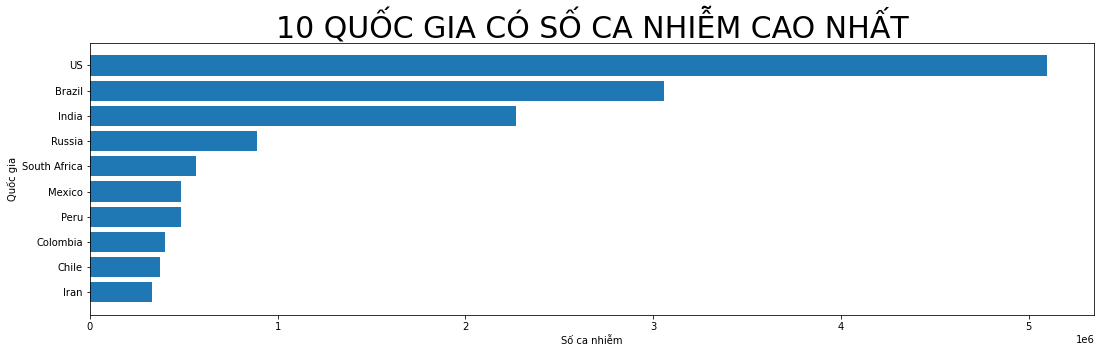

In [9]:
# Vẽ biểu đồ thể hiện 10 quốc gia có số ca nhiễm cao nhất và so sánh với Việt Nam
df_top10_country_confirm = df_covid19.sort_values('Confirmed', ascending= False)[:10]['Confirmed'].astype(np.int)
df_top10_country_confirm

plt.figure(figsize=(18,5))
plt.title("10 QUỐC GIA CÓ SỐ CA NHIỄM CAO NHẤT",fontsize=30)
plt.xlabel("Số ca nhiễm")
plt.ylabel("Quốc gia")
plt.barh(df_top10_country_confirm.index[::-1], df_top10_country_confirm.values[::-1])

<BarContainer object of 10 artists>

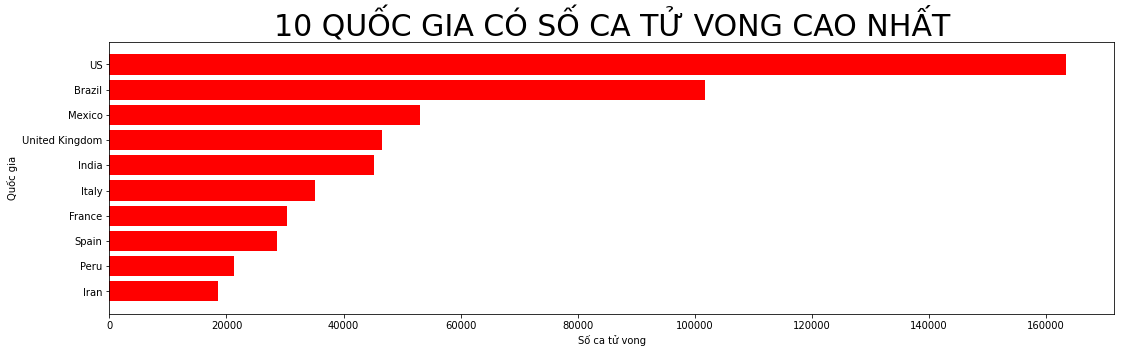

In [10]:
# Vẽ biểu đồ thể hiện 10 quốc gia có số người chết cao nhất và so sánh với Việt Nam
df_top10_country_death = df_covid19.sort_values('Deaths', ascending= False)[:10]['Deaths'].astype(np.int)
df_top10_country_death

plt.figure(figsize=(18,5))
plt.title("10 QUỐC GIA CÓ SỐ CA TỬ VONG CAO NHẤT", fontsize = 30)
plt.xlabel("Số ca tử vong")
plt.ylabel("Quốc gia")
plt.barh(df_top10_country_death.index[::-1], df_top10_country_death.values[::-1], color="red")

# 2. DỰ ĐOÁN SỐ CA NHIỄM BỆNH TRONG 14 NGÀY TIẾP THEO TRÊN TOÀN THẾ GIỚI: 
### Tiếp theo ta dùng dữ liệu trong file "time_series_covid_19_confirmed.csv" - thể hiện số người nhiễm trên 267 quốc gia và vùng lãnh thổ từ ngày 22/01/2020 - 01/08/2020

- Đầu tiên, ta tải dữ liệu vào "df_confirm".
- Tương tự như xử lý cho df_covid19, ta đổi tên lại cho thuận tiện

In [11]:
df_confirm = pd.read_csv("time_series_covid_19_confirmed.csv")
df_confirm = df_confirm.rename(columns={"Province/State":"province","Country/Region": "country"})

# 2.1 Thống kê số lượng ca nhiễm trong thời gian qua (trên toàn thế giới)

- Ta thống kê số lượng ca nhiễm bệnh trên toàn thế giới từ ngày 22/01/2020 - 01/08/2020. Để tiện hơn cho việc quan sát, ta xem ngày 22/01 là ngày thứ 0, lần lượt xét tiếp theo 10 ngày (ngày thứ 10, 20, 30,...)
- Biểu đồ:
    + Trục x: ngày (từ 0 - 191)
    + Trục y: số lượng ca nhiễm tương ứng.

In [12]:
list_date = df_confirm.iloc[:,5:].sum(axis =0)
cases = list_date.values
dates = np.arange(0,len(cases[:]))

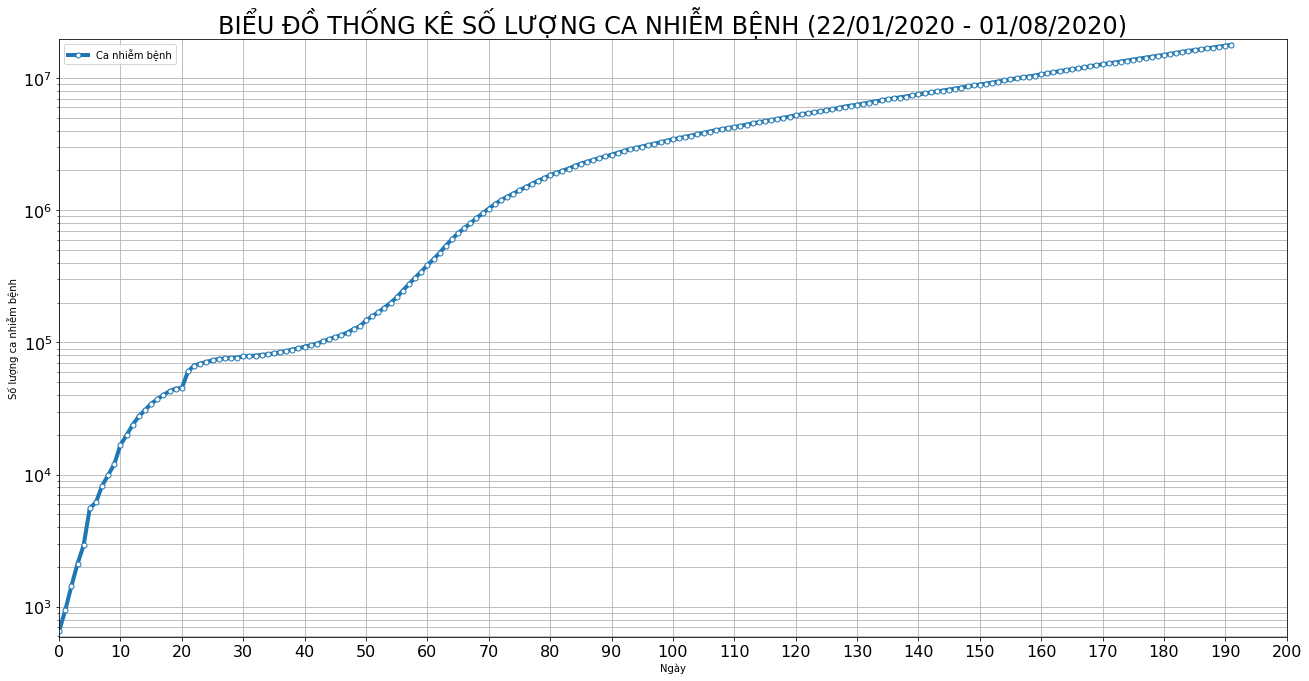

In [13]:
plt.figure(figsize=(22,11))

# marker_style: định nghĩa mục đích vẽ biểu đồ đẹp hơn 
marker_style = dict(linewidth=4, linestyle='-', marker='.',markersize=10, markerfacecolor='#ffffff')
plt.plot(dates, cases,"-.",label="Ca nhiễm bệnh", **marker_style)

# ylim: thêm khoảng trống ở đầu và đuôi, mục đích vẽ biểu đồ đẹp hơn
plt.xlim(dates[0], dates[-1])
plt.ylim(cases.min() - cases.min()/10, cases.max() + cases.max()/10)

# dùng plt.xticks để đánh dấu các vị trí cho trục x
plt.tick_params(labelsize = 16)        
plt.xticks(np.arange(0, len(cases[:]) + 10, 10),[str(i) for i in range(len(cases[:]) + 10)][::10]) 

plt.title("BIỂU ĐỒ THỐNG KÊ SỐ LƯỢNG CA NHIỄM BỆNH (22/01/2020 - 01/08/2020)",fontsize=24)
plt.xlabel("Ngày")
plt.ylabel("Số lượng ca nhiễm bệnh")
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")

## Một số nhận xét: 
- Ta thấy mô hình mô hình có xu hướng tăng và ổn định (đường biểu diễn trơn - smooth). Có khả năng là ta có thể xây dựng mô hình dự đoán. 
- Tuy nhiên, nhìn kỹ hơn ta sẽ thấy 2 vấn đề:
     + Ở phần đầu của mô hình ta thấy dữ liệu có vẻ không được trơn cho lắm, có thể gây nhiễu mô hình của ta khi dự đoán. 
     + Thêm nữa, khoảng dữ liệu của ta quá rộng (những ngày đầu tiên quá thấp - vài trăm hoặc vài nghìn, trong khi những ngày tiếp theo con số rất lớn - vài triệu đến vài chục triệu). Việc các tham số có độ rộng quá lớn sẽ dẫn đến việc mô hình của ta dự đoán không chính xác. 

## Đề xuất cách giải quyết, gồm 2 bước: 
#### 1. Ta bỏ đi những giá trị dưới 100000 (tương ứng là những giá trị trong những ngày đầu tiên).
#### 2. Do đầu ra dự đoán y có độ rộng quá lớn, ta sẽ xử lý bằng cách lấy logarit10(x)

In [14]:
threshold = 100000
list_bool = cases > threshold
cases = cases[list_bool]
datas = dates[list_bool]

In [15]:
train_y = np.log10(cases.astype("float32")).reshape((cases.shape[0], 1))
train_x = np.arange(1, len(train_y) + 1).reshape((train_y.shape[0], 1))

# 2.2 Xây dựng mô hình: 
- Ta xây dựng mô hình học máy để dự đoán số ca nhiễm trong 14 ngày (2 tuần) tiếp theo dựa vào số lượng ca nhiễm trong quá khứ. 
- Mô hình chọn ở đây là Neural Network. Mô hình được xây dựng dựa trên thư viện Keras.

In [16]:
import keras
from keras.layers import Input, Dense, Activation, Dropout, ReLU
from keras.optimizers import Adam
from keras import models
from keras.initializers import glorot_uniform

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## Neural Network:
Input layer --> Hidden layer 1 --> Hidden layer 2 --> Output layer

### Kiến trúc: 
1. Input layer: numpy array có kích thước (1,) (0 tương ứng ngày thứ nhất, 1 tương ứng ngày thứ hai,...)
2. Hidden layer 1: gồm 100 node(unit). Theo sau là hàm kích hoạt ReLU.
3. Hidden layer 2: gồm 50 node(unit). Theo sau là hàm kích hoạt ReLU.
4. Output layer: numpy array có kích thước (1,). Giá trị dự đoán số người nhiễm Covid.

### Hàm mất mát dùng là "mean squared error": vì đây là bài toán hồi quy.
### Thuật toán tối ưu dùng là: Adam. Với learning rate = 0.001 
### Huấn luyện với epochs = 1000

In [17]:
def model_predict_covid19():
    """
    Hàm số dự đoán số ca nhiễm trong 14 ngày tiếp theo dựa vào số lượng ca nhiễm trong quá khứ
    Input shape: (1,)
    Output shape: (1,) 
    """
    input_model = Input(shape=(1,))
    
    Dense_1 = Dense(100, name="Dense_l1", kernel_initializer= glorot_uniform(0))(input_model)
    ReLU_1 = ReLU(name = "ReLU_1")(Dense_1)

    Dense_2 = Dense(50,name = "Dense_l2", kernel_initializer= glorot_uniform(0))(ReLU_1)
    ReLU_2 = ReLU(name = "ReLU_2")(Dense_2)

    Dense_3 = Dense(10,name = "Dense_l3", kernel_initializer= glorot_uniform(0))(ReLU_2)
    ReLU_3 = ReLU(name = "ReLU_3")(Dense_3)

    Dense_4 = Dense(1,name="Dense_l4", kernel_initializer= glorot_uniform(0))(ReLU_3)
    
    output_model = ReLU(name = "Output")(Dense_4)

    model = models.Model(inputs=input_model, outputs=output_model, name='Covid19_Predict_Comfirm')
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])
    
    return model

In [18]:
Covid_model = model_predict_covid19()
Covid_model.summary()

Model: "Covid19_Predict_Comfirm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 100)               200       
_________________________________________________________________
ReLU_1 (ReLU)                (None, 100)               0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 50)                5050      
_________________________________________________________________
ReLU_2 (ReLU)                (None, 50)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 10)                510       
_________________________________________________________________
ReLU_3 (ReLU)                (None, 10)    

In [19]:
EPOCHS = 1000
Covid_model.fit(x=train_x, y=train_y, epochs=EPOCHS)


Epoch 1/1000
149/149 [==============================] - 0s 2ms/step - loss: 25.8212 - accuracy: 0.0000e+00
Epoch 2/1000
149/149 [==============================] - 0s 125us/step - loss: 11.3316 - accuracy: 0.0000e+00
Epoch 3/1000
149/149 [==============================] - 0s 134us/step - loss: 10.0374 - accuracy: 0.0000e+00
Epoch 4/1000
149/149 [==============================] - 0s 134us/step - loss: 7.7468 - accuracy: 0.0000e+00
Epoch 5/1000
149/149 [==============================] - 0s 141us/step - loss: 8.6950 - accuracy: 0.0000e+00
Epoch 6/1000
149/149 [==============================] - 0s 121us/step - loss: 7.6283 - accuracy: 0.0000e+00
Epoch 7/1000
149/149 [==============================] - 0s 134us/step - loss: 7.9334 - accuracy: 0.0000e+00
Epoch 8/1000
149/149 [==============================] - 0s 127us/step - loss: 7.4859 - accuracy: 0.0000e+00
Epoch 9/1000
149/149 [==============================] - 0s 123us/step - loss: 7.5041 - accuracy: 0.0000e+00
Epoch 10/1000
149/149 [===

149/149 [==============================] - 0s 114us/step - loss: 0.1736 - accuracy: 0.0000e+00
Epoch 75/1000
149/149 [==============================] - 0s 107us/step - loss: 0.1769 - accuracy: 0.0000e+00
Epoch 76/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0887 - accuracy: 0.0000e+00
Epoch 77/1000
149/149 [==============================] - 0s 107us/step - loss: 0.1030 - accuracy: 0.0000e+00
Epoch 78/1000
149/149 [==============================] - 0s 102us/step - loss: 0.1333 - accuracy: 0.0000e+00
Epoch 79/1000
149/149 [==============================] - 0s 107us/step - loss: 0.1137 - accuracy: 0.0000e+00
Epoch 80/1000
149/149 [==============================] - 0s 100us/step - loss: 0.1130 - accuracy: 0.0000e+00
Epoch 81/1000
149/149 [==============================] - 0s 107us/step - loss: 0.1073 - accuracy: 0.0000e+00
Epoch 82/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0941 - accuracy: 0.0000e+00
Epoch 83/1000
149/149 [==========

149/149 [==============================] - 0s 100us/step - loss: 0.0215 - accuracy: 0.0000e+00
Epoch 149/1000
149/149 [==============================] - 0s 105us/step - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 150/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0251 - accuracy: 0.0000e+00
Epoch 151/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 152/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 153/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 154/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0209 - accuracy: 0.0000e+00
Epoch 155/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0200 - accuracy: 0.0000e+00
Epoch 156/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0276 - accuracy: 0.0000e+00
Epoch 157/1000
149/149 [=

149/149 [==============================] - 0s 107us/step - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 223/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 224/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 225/1000
149/149 [==============================] - 0s 101us/step - loss: 0.0229 - accuracy: 0.0000e+00
Epoch 226/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 227/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0217 - accuracy: 0.0000e+00
Epoch 228/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0251 - accuracy: 0.0000e+00
Epoch 229/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0236 - accuracy: 0.0000e+00
Epoch 230/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0255 - accuracy: 0.0000e+00
Epoch 231/1000
149/149 [=

149/149 [==============================] - 0s 107us/step - loss: 0.0163 - accuracy: 0.0000e+00
Epoch 297/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 298/1000
149/149 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.0000e+ - 0s 107us/step - loss: 0.0112 - accuracy: 0.0000e+00
Epoch 299/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 300/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0149 - accuracy: 0.0000e+00
Epoch 301/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 302/1000
149/149 [==============================] - 0s 94us/step - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 303/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 304/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0143 - a

149/149 [==============================] - 0s 107us/step - loss: 0.0108 - accuracy: 0.0000e+00
Epoch 371/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 372/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 373/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 374/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 375/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 376/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 377/1000
149/149 [==============================] - 0s 110us/step - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 378/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 379/1000
149/149 [=

149/149 [==============================] - 0s 107us/step - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 445/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 446/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0098 - accuracy: 0.0000e+00
Epoch 447/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 448/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 449/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 450/1000
149/149 [==============================] - 0s 105us/step - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 451/1000
149/149 [==============================] - 0s 103us/step - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 452/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 453/1000
149/149 [=

149/149 [==============================] - 0s 114us/step - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 519/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 520/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 521/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 522/1000
149/149 [==============================] - 0s 109us/step - loss: 0.0353 - accuracy: 0.0000e+00
Epoch 523/1000
149/149 [==============================] - 0s 102us/step - loss: 0.0388 - accuracy: 0.0000e+00
Epoch 524/1000
149/149 [==============================] - 0s 109us/step - loss: 0.0312 - accuracy: 0.0000e+00
Epoch 525/1000
149/149 [==============================] - 0s 103us/step - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 526/1000
149/149 [==============================] - 0s 104us/step - loss: 0.1036 - accuracy: 0.0000e+00
Epoch 527/1000
149/149 [=

149/149 [==============================] - 0s 100us/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 593/1000
149/149 [==============================] - 0s 127us/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 594/1000
149/149 [==============================] - 0s 141us/step - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 595/1000
149/149 [==============================] - 0s 134us/step - loss: 0.0245 - accuracy: 0.0000e+00
Epoch 596/1000
149/149 [==============================] - 0s 134us/step - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 597/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 598/1000
149/149 [==============================] - 0s 94us/step - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 599/1000
149/149 [==============================] - 0s 94us/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 600/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 601/1000
149/149 [===

149/149 [==============================] - 0s 102us/step - loss: 0.1103 - accuracy: 0.0000e+00
Epoch 667/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0630 - accuracy: 0.0000e+00
Epoch 668/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0576 - accuracy: 0.0000e+00
Epoch 669/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0188 - accuracy: 0.0000e+00
Epoch 670/1000
149/149 [==============================] - 0s 105us/step - loss: 0.0192 - accuracy: 0.0000e+00
Epoch 671/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0167 - accuracy: 0.0000e+00
Epoch 672/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 673/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 674/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 675/1000
149/149 [=

149/149 [==============================] - 0s 107us/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 741/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 742/1000
149/149 [==============================] - 0s 101us/step - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 743/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 744/1000
149/149 [==============================] - 0s 94us/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 745/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 746/1000
149/149 [==============================] - 0s 96us/step - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 747/1000
149/149 [==============================] - 0s 100us/step - loss: 9.2669e-04 - accuracy: 0.0000e+00
Epoch 748/1000
149/149 [==============================] - 0s 107us/step - loss: 9.7605e-04 - accuracy: 0.0000e+00
Epoch 749/1000
149/

149/149 [==============================] - 0s 114us/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 815/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 816/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 817/1000
149/149 [==============================] - 0s 120us/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 818/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 819/1000
149/149 [==============================] - 0s 109us/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 820/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 821/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0283 - accuracy: 0.0000e+00
Epoch 822/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0851 - accuracy: 0.0000e+00
Epoch 823/1000
149/149 [=

149/149 [==============================] - 0s 114us/step - loss: 6.7963e-04 - accuracy: 0.0000e+00
Epoch 889/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 890/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 891/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 892/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 893/1000
149/149 [==============================] - 0s 101us/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 894/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 895/1000
149/149 [==============================] - 0s 109us/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 896/1000
149/149 [==============================] - 0s 100us/step - loss: 9.5463e-04 - accuracy: 0.0000e+00
Epoch 897/1000
14

149/149 [==============================] - 0s 110us/step - loss: 0.0394 - accuracy: 0.0000e+00
Epoch 963/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0715 - accuracy: 0.0000e+00
Epoch 964/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 965/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 966/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 967/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 968/1000
149/149 [==============================] - 0s 110us/step - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 969/1000
149/149 [==============================] - 0s 98us/step - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 970/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 971/1000
149/149 [==

### Sau khi huấn luyện mô hình xong, ta thực hiện việc dự đoán số người nhiễm Covid19 trong 14 ngày tới.
### Lưu ý: 
1. Do trước khi huấn luyện, ta thực hiện phép tính np.log10() cho nên sau khi tính đầu ra của dữ liệu ta thực hiện ngược lại phép tính log10(x) là pow(10,x)
2. Ta lấy kết quả đầu ra chia cho 100000 cho biểu đồ dễ nhìn hơn.

In [20]:
from datetime import datetime, timedelta, date
from matplotlib import ticker

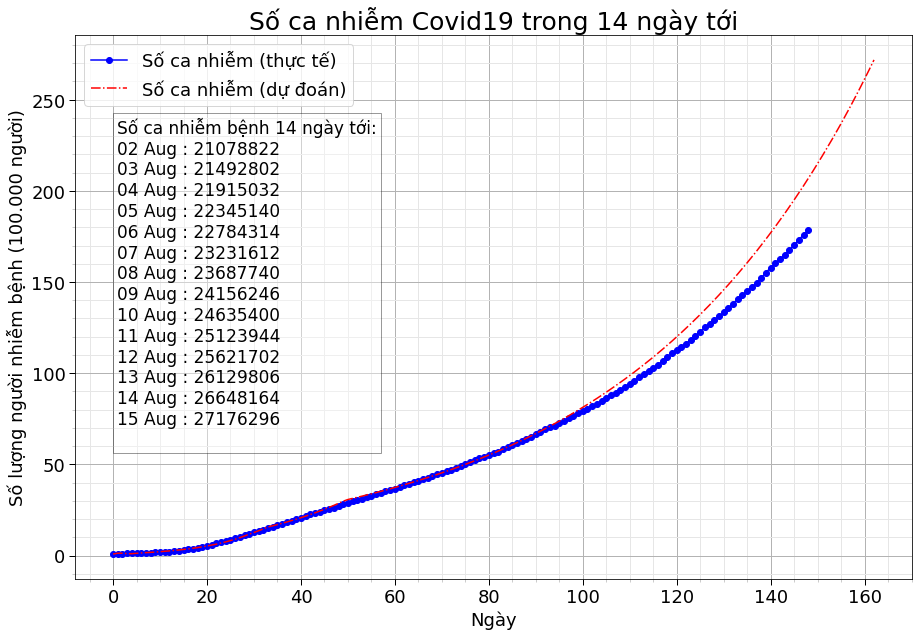

In [25]:
# Vẽ biểu đô thể hiện sự dự đoán

prediction_days = 14

predict_cases = np.power(10, Covid_model.predict(np.arange(1, len(cases) + 14 + 1)))
 
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(cases))

plt.plot(date, cases/100000, "-o", color="blue", label="Số ca nhiễm (thực tế)")

date = np.arange(0,len(predict_cases))

plt.plot(date, predict_cases/100000,"-.",color="red",label="Số ca nhiễm (dự đoán)")

# Đoạn code này dùng để vẽ lên bảng nằm góc trái (Số ca nhiễm bệnh 14 ngày tới)
case_nums_country = df_confirm.groupby("country").sum().drop(["Lat", "Long"],axis =1).apply(lambda x: x[x > 0].count(), axis =0)

position = np.sum(list_bool == False)

d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index][position:]

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Số ca nhiễm bệnh "+str(prediction_days) +" ngày tới:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(int(predict_cases[-1*(prediction_days-i)]))+"\n"
    
plt.text(0.05, 0.85, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

plt.title("Số ca nhiễm Covid19 trong 14 ngày tới",fontsize=25)
plt.xlabel("Ngày", fontsize =18)
plt.ylabel("Số lượng người nhiễm bệnh (100.000 người)",fontsize =18)

plt.legend(fontsize =18)
plt.tick_params(labelsize = 18) 